# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

1. Forward pass
2. Calculate the loss
3. 	Zero gradients
4. Perform backpropagation on the loss
5. Update the optimizer (gradient descent)

In [2]:
pip install nbstripout

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import torch
import numpy as np
import seaborn as sns
from torch import nn

torch.manual_seed(42)
######################
X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

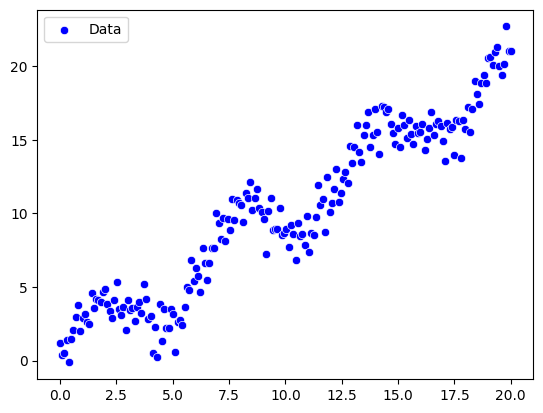

In [4]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [5]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [6]:
df = Simple1DRegressionDataset(X,y)


In [7]:
df[0]


(tensor([0.]), tensor([1.1701]))

In [8]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [9]:
data_point = next(iter(training_loader))
data_point


[tensor([[8.8442]]), tensor([[10.3936]])]

In [10]:
# construct the model using Linear block
in_features = 1
out_features = 1
#model_2 = nn.Linear(in_features,out_features)


In [11]:
loss_fn = nn.MSELoss()

In [ ]:
# 

In [70]:
class ComplexRegressor(nn.Module):
    def __init__(self):
        super(ComplexRegressor, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.net(x)
    
model = ComplexRegressor()


In [71]:
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

In [72]:
# so we need now a training loop
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=optimizer):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
            print(running_loss)



In [73]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [79]:
model = ComplexRegressor().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [80]:
#model_2 = nn.Linear(in_features=1, out_features=1)

In [81]:
train_simple_network(model,
                loss_fn,
                training_loader,
                device=device,
                epochs=30
                )


Epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

289.79339599609375
303.09401988983154
597.6401319503784
852.7346601486206
1067.981562614441
1141.8474760055542
1231.5324125289917
1369.883044242859
1385.7797966003418
1396.8877172470093
1791.361746788025
1802.5350542068481
1829.4127855300903
2104.561406135559
2151.5565042495728
2165.6121492385864
2265.7068300247192
2279.724458694458
2618.203462600708
2676.121850967407
2915.2228031158447
2915.6725750267506
2992.3728390038013
3001.5990133583546
3050.771124869585
3051.2171559929848
3127.7600331902504
3191.3678899407387
3195.0526846051216
3433.782970249653
3493.3893850445747
3493.7626420259476
3686.457054257393
3768.4268189668655
3768.5312969237566
3769.874464467168
3813.3602432757616
3827.1504835635424
4036.0740370303392
4202.709138348699
4348.29017777741
4349.7342823296785
4397.035109356046
4420.308825328946
4452.251627758145
4577.915194347501
4633.055601909757
4840.221266582608
5067.6117237359285
5068.565983489156
5311.81868429482
5525.915592864156
5530.947645381093
5611.539541438222
58

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

141.31546020507812
260.71099853515625
261.1347002387047
263.0971305966377
300.6672561764717
470.3479354977608
485.2360389828682
665.6080177426338
667.0825379490852
699.9983704686165
708.7097943425179
711.121121942997
836.4819388985634
886.1528716683388
886.412414342165
1066.5804441273212
1202.3329313099384
1202.3372990232892
1243.9404789549299
1368.6218296629377
1396.800019894261
1491.9682175260969
1508.0700947386213
1611.7704502684064
1761.9556919676252
1785.098525677342
1984.7458035093732
2092.4341808897443
2116.9127327543683
2119.358700190205
2133.1672252756543
2161.2784904581495
2178.8241714579053
2211.5720619303174
2431.6772712809034
2527.4500755411573
2536.040711794514
2536.98339483561
2546.9511129599996
2668.933725569863
2679.911810134072
2770.5139524680562
2795.2551214438863
2812.8829138022847
2852.2038099509664
2933.6526396018453
2982.1095754844137
3000.5523912650533
3010.1106779319234
3073.8065206748433
3073.881365690846
3177.5512265306897
3211.2827252489515
3235.381722365040

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

125.59835815429688
147.80914878845215
196.3669834136963
196.38880217634141
254.28412688337266
254.69040158949792
259.9907451029867
263.4611015673727
272.05492500029504
311.260476147756
319.9337778445333
320.8891348596662
364.12619159184396
420.2409338708967
460.8480314966291
481.67456004582345
560.9871363397688
598.410594439134
600.0648767706007
612.9656831976026
632.2289526220411
676.062776779756
676.1769707035273
711.2893440555781
711.9475413393229
727.3697024416178
754.8035574983805
780.4449301790446
898.3383551668376
967.759734256193
1129.4539328645915
1129.5378703009337
1151.5354594122618
1231.1867121588439
1272.6217707525939
1273.6635670792311
1323.3065838944167
1323.5821133684367
1348.2146302293986
1372.7935677599162
1431.8329087328166
1449.0821305345744
1545.032005412504
1545.037674099207
1564.171457439661
1604.5013944208622
1648.6165296137333
1650.533812314272
1694.5198657810688
1713.8664787113667
1769.2244308292866
1798.4362781345844
1892.8451755344868
1985.7374027073383
2015

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.6849985122680664
24.329726219177246
28.58816146850586
44.48801326751709
106.0148229598999
126.95221042633057
140.05350971221924
157.01540851593018
158.6258144378662
162.17971277236938
164.02914190292358
165.28878724575043
202.6861833333969
204.04442274570465
210.3932534456253
217.4649921655655
251.8460727930069
278.98620760440826
283.06608164310455
297.97770369052887
298.4775834083557
305.47873735427856
324.77495431900024
325.70656430721283
331.50139129161835
345.08745181560516
375.8958033323288
377.8831593990326
398.14647459983826
403.91796374320984
423.7035834789276
444.4818789958954
458.70461344718933
465.5976369380951
470.2688739299774
497.60365176200867
498.07083028554916
517.4082497954369
561.3078469634056
681.957238137722
728.9406594634056
751.360464990139
775.869477212429
781.5853127837181
796.9243230223656
802.2965797781944
806.5706238150597
814.1105903983116
861.7468857169151
878.871086537838
887.3804478049278
918.7199901938438
923.5536183714867
970.0415562987328
993.636872

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.12816999852657318
38.39514158666134
60.88680838048458
67.02996633946896
67.47740440070629
67.5214255452156
72.60736733675003
80.98384553194046
95.68489056825638
95.76347317546606
97.54498412460089
97.57227114588022
107.16554144769907
118.9198968783021
124.37985638529062
127.0441518202424
143.87722448259592
162.29497579485178
164.44694451242685
181.9514515772462
225.92293671518564
257.7731297388673
292.2145245447755
293.26370445638895
297.36318842321634
310.2276293411851
312.4262899532914
312.76882023364305
314.2005849555135
314.77335096150637
315.2569563165307
318.1481976285577
318.6505130305886
322.11577973514795
328.43274626880884
329.7641987577081
330.2413950935006
330.32333367317915
330.3827503398061
333.35352570563555
346.055292673409
346.7362982109189
347.33267886191607
347.5871244445443
349.04984245449305
356.6356068626046
359.5199070945382
385.0374947562814
391.6338888183236
393.5572790876031
394.0396205559373
399.8938032761216
426.65146128088236
435.601845420897
517.96757570

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.1662163734436035
7.249130725860596
7.583347111940384
35.60259035229683
105.70328310132027
113.37031677365303
115.24811020493507
125.96225491166115
133.13659754395485
165.00801172852516
165.28567057847977
172.25552397966385
190.7398551106453
194.42476779222488
199.2806161046028
199.50503720343113
206.2747377306223
206.42625035345554
206.446438184008
248.15631901286542
272.5980609562248
273.17392670176923
279.4746264126152
299.0968416836113
327.35728632472456
336.00751863978803
336.4000497367233
336.400722864666
336.7227814231301
336.7234482318163
341.04721780121326
364.6940111666918
365.9955739527941
366.8586449176073
368.2686041146517
375.4342644959688
384.5077164918184
386.44497092068195
407.23618300259113
407.3586665838957
407.4374417886138
408.3927531465888
408.7626042291522
410.41986798495054
414.58585404604673
416.5936019346118
424.11152052134275
424.1161773717031
446.8811920201406
447.0212496733293
448.46311523672193
448.8390256082639
449.10833518859
449.46943511720747
451.6821

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.415691375732422
7.29793906211853
7.441270619630814
8.785741001367569
18.286556392908096
25.230662018060684
25.78831234574318
26.094425678253174
39.86004018783569
50.77638006210327
62.17682695388794
63.757463335990906
87.97774493694305
88.03676707297564
88.29307968169451
88.35178840905428
95.36613596230745
95.4844600558281
98.8391529917717
99.2158713042736
100.14184638857841
100.77023449540138
121.68014660477638
125.65410414338112
126.93840780854225
128.70257714390755
129.64717134833336
130.2109337747097
130.4304252564907
131.5117811858654
132.55482432246208
132.79206623136997
133.74619276821613
133.7913105636835
133.94766062498093
144.8436614871025
145.64555472135544
145.83801467716694
148.56356866657734
154.42407329380512
159.94597013294697
160.34607727825642
160.8987326771021
160.91923254542053
161.0889047961682
161.82819914631546
162.11056050471961
164.39354213885963
171.495919553563
175.04860624484718
231.7340272348374
236.62363847903907
239.11559352092445
240.4245369117707
322.7

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

48.71726608276367
380.5428886413574
389.2077350616455
578.3751850128174
687.0891819000244
1061.3360996246338
1230.12766456604
1260.625228881836
1294.326114654541
1296.5734188556671
1343.788434267044
1582.4464085102081
1690.2223484516144
1695.9538061618805
1697.164812207222
1789.103647351265
1791.8473848104477
1799.4851669073105
1811.839531302452
2039.3837512731552
2044.0438746213913
2151.2496851682663
2162.521430850029
2260.979453921318
2263.5714453458786
2286.893730044365
2324.23878467083
2326.04312646389
2345.023682951927
2521.783189177513
2542.686656355858
2542.7614914551377
2613.324754394591
2687.5907150879502
2693.292771972716
2785.7488037720323
2837.229253448546
2884.4536720886827
2884.493708640337
2933.5679312050343
2940.7743573486805
2957.698072940111
3018.2281899750233
3021.4655852615833
3068.9978576004505
3097.812043696642
3098.3947956860065
3128.5659382641315
3249.168973237276
3249.934341222048
3317.6644742786884
3321.052760154009
3321.60260912776
3321.716970048845
3461.0567

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.78782057762146
10.973256826400757
81.05077910423279
135.02879118919373
161.3222634792328
189.32000708580017
207.46541571617126
208.9500072002411
214.51843523979187
250.723730802536
274.3900420665741
314.38639521598816
336.7191035747528
377.2814242839813
377.354277163744
388.7332473099232
419.7770362198353
422.6526987850666
430.7807686626911
444.09137085080147
473.44031646847725
473.4693993348628
509.53263938613236
595.6593331117183
618.1136788148433
670.4731262940913
686.7254475373775
691.7270034570247
704.85465371795
748.3489965219051
784.7077764291316
825.7894910592586
826.2398414928466
841.5691271144897
846.1632118541747
887.2454643566161
900.4202947933227
919.4840517360717
932.6136923152953
951.11485770531
952.4434858877212
1005.0312391836196
1010.7955776769668
1017.2849093992263
1041.7376109678298
1043.085875781253
1113.8873284179717
1127.9054634887725
1203.0077889282256
1299.960273059085
1336.2490418273956
1338.1786355096847
1367.7023591119796
1400.9358605463058
1409.4120654184

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

75.148681640625
188.29743194580078
188.30198833998293
219.28339550551027
249.05417034681886
267.4262654548511
276.2717072730884
289.11266968306154
313.92445061262697
314.90367040690035
425.97717962320894
431.3427101140842
462.4079490667209
484.58400116022676
527.3110176092014
560.1074577337131
560.1790736531839
560.2793640783057
623.568216769956
625.1112655093893
700.4856780460104
737.1657775333151
789.0174621036276
839.4662612369284
865.390772192739
871.0220197131857
1032.106324522756
1063.561185210012
1066.3918145587668
1109.3696702411398
1124.4123509814963
1161.1411679675803
1162.2146522691473
1171.71486493852
1198.1168348481879
1198.3591988673434
1217.8243268122897
1219.117427884601
1255.361885129474
1260.5129428496584
1287.1990981688723
1306.86020618584
1318.3857389083132
1348.7116742720827
1441.4639859786257
1497.1608701338992
1528.8545232405886
1555.7470899214968
1639.1725812545046
1689.8158498397097
1710.9183793654665
1716.8542824378237
1775.0572853675112
1793.900365888141
1813

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

24.99309539794922
25.44048500061035
29.87423849105835
55.56150960922241
58.51470327377319
58.584380105137825
61.24613733589649
67.07085628807545
70.78162308037281
75.7520205527544
77.26698525249958
80.06539519131184
100.17047293484211
109.40190203487873
111.05576486885548
124.32550878822803
126.82010073959827
167.2016772776842
167.2850657775998
169.8430150821805
170.1098567917943
172.32313794642687
249.7848154976964
251.7225517705083
273.50893253833055
278.1542972996831
291.69406075030565
303.10122246295214
303.12043595686555
306.054647449404
330.15614319220185
348.7193679846823
351.7487130202353
351.75262726144865
358.09328544931486
416.99966896371916
449.69173134164885
456.80335272150114
457.9969647009857
476.26429487066343
496.821109064389
515.6873505194671
603.5686447699554
610.1830270369537
635.4046247084625
643.7201707442291
644.2479764898308
644.6945563335903
664.6686469097622
670.8229123135097
671.2717306395061
671.7300487239845
705.2411075313576
715.4520440776832
720.640832014

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.0489299297332764
20.58572268486023
23.477126121520996
44.86426639556885
61.80485248565674
64.08327293395996
83.2649917602539
99.75202560424805
177.71977615356445
249.72258377075195
311.0401611328125
319.4964256286621
320.5850292444229
338.6940151453018
345.2885695695877
348.9431747198105
349.85048431158066
349.8508620650973
354.1600985915866
364.9023557098117
370.8812141807284
380.1919966132846
397.61142829968594
431.69880775525235
436.1469912917819
446.64504674985074
468.4909634978976
494.6233754546847
564.4191289336886
564.4271482245531
605.8806508795824
627.3972295538988
627.4154815336224
648.6939391752239
662.0048350950237
675.7788085599896
682.6675409933086
731.1354822774883
738.161842312431
763.9987182279583
778.6533174177166
779.4568828006741
784.2420557399746
800.6599710842129
800.9568896254059
812.6889529188629
821.6068921049591
822.8012084921356
822.8750656133052
831.3463676457759
832.6994537597056
847.3327383284923
933.2044119124766
936.131366658723
936.334883991396
940.71

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

46.60717010498047
53.02072286605835
60.211530685424805
77.53312110900879
78.69306373596191
79.47049987316132
91.76596534252167
92.40186303853989
112.81146043539047
113.72901099920273
119.28731244802475
138.0651292204857
138.08512954600155
171.5434425342828
173.28776829130948
175.5190204847604
182.54581014998257
183.21532635577023
201.34280781634152
259.7709198463708
596.2325897682458
822.2327118385583
838.0068569649011
838.0396969821304
1015.8451626803726
1015.856773449108
1217.0562058221549
1221.5799041520804
1348.8036437761039
1359.029540611431
1359.0759903658181
1365.966838048771
1516.4351302850991
1626.1681930292398
1626.7120802272111
1671.958101497963
1719.7569029200822
1833.962881313637
1853.5350611079484
1947.8081018794328
1954.4474146235734
1958.525511013344
1968.530131565407
2153.3900863993913
2194.0864250529557
2295.4350120890886
2477.805281864479
2513.1825439799577
2527.5771438945085
2544.5653526652604
2569.141360508278
2597.234980808571
2717.7397568095475
2725.2941157687455

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

36.264060974121094
39.76763701438904
43.67407441139221
85.86161255836487
92.93572545051575
104.73219513893127
123.50012803077698
153.38225197792053
175.91222977638245
188.5246937274933
237.50195813179016
238.03184723854065
238.41832765936852
259.2597297132015
281.67000994086266
293.862279266119
304.23563131690025
309.83181700110435
422.34278044104576
443.13309225440025
443.9968712627888
464.5173275768757
469.36216190457344
487.4863093197346
494.35993936657906
496.82169368863106
504.8860314190388
509.6865041553974
514.4127710163593
515.3175524771214
523.5691012442112
530.6685813963413
536.8950289785862
565.4387587606907
594.5667513906956
596.9608277380466
620.8783978521824
634.8865050375462
651.8332385122776
661.1365193426609
668.9079326689243
669.5603568851948
670.629464417696
678.649749070406
690.0106337368488
690.1342299282551
690.8105561435223
702.5159079730511
704.3552257716656
714.9981786906719
718.9382774531841
729.3357927501202
730.4409804046154
755.8920626342297
760.49583956599

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.16618318855762482
0.37258461117744446
5.619783669710159
7.812223702669144
8.974696546792984
22.395026594400406
22.65496537089348
31.065571755170822
34.8221318423748
35.570704609155655
44.61061683297157
45.383744448423386
46.68726536631584
53.34447714686394
56.64717718958855
86.72087141871452
89.20765945315361
97.97252914309502
101.7215459048748
101.72204025398241
101.96481009136187
102.06366117607104
110.61930997978197
110.6194512029615
120.39024893245369
120.8103677113977
120.83300628377765
120.90601523085206
121.04287385805219
124.7945964322862
126.82649969919294
127.1509746597585
136.46361580355733
138.079035310584
155.0978226946172
172.49421170218557
173.10674974186986
173.2247067080316
175.9095895872888
178.36035519703
178.76694816215604
182.24606174095243
182.28909344835847
186.02787037058442
186.6641438142833
186.89730366929143
188.22056946023076
199.69607338173955
204.22439560158818
204.36316583915323
204.38450096226006
204.60163703239232
204.6049538061925
206.40902916649065


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.0011856566416099668
3.2177865515695885
3.315168813918717
3.320739201386459
6.241904667695053
6.9397972143488005
26.351210407097824
26.702139220316894
40.217405638773926
40.241341945831664
47.90187585086096
62.795944568817504
66.5381230089115
66.53813151392751
70.79457930598073
72.25779906782918
72.29532312724405
72.72347869846635
83.8415063855391
95.29163494083696
102.95975675556474
108.5338710782271
113.5480312344771
116.93531646702104
117.47189100954347
120.8194819328528
120.84935432050042
122.66043811414056
128.92153888318353
148.9793582496386
152.15844040486627
152.24987657490783
153.72512419644409
154.79401083413177
154.83852880198174
155.57894818979912
155.59367350332104
157.15392843477093
157.67468533508145
158.8636860608276
160.44541368476712
173.37562665931546
200.35125455848538
200.46901950083338
239.77168902597987
257.8346277161654
264.169234840494
308.26764258585536
308.88123199186884
309.81433012924754
309.8467429450866
315.4163502029296
328.17906077421867
338.6073034576

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.6372547745704651
2.1976502537727356
16.882106125354767
17.189734637737274
21.637765109539032
30.62980192899704
36.95854061841965
37.75516438484192
42.70835471153259
43.4534552693367
49.70867186784744
49.71788657736033
49.748334161005914
50.92880748864263
64.83991169091314
65.51135121937841
70.58376514073461
81.07794009801
87.85754453297704
88.64259403105825
95.21898429747671
95.2664317926392
96.3006707271561
97.80947385635227
99.49505315627903
105.91251931991428
152.2427843650803
155.15460453834385
165.5145631870255
196.08784542884678
200.06698332633823
201.50796721782535
201.99602357950062
202.5712013086304
204.2068136772141
205.27414892520756
207.87540195789188
215.6178903421387
226.50154207553715
228.5098683675751
246.3936574300751
269.5430753072724
281.34153054561466
281.3494744338095
285.0467996634543
286.1549549140036
287.67337906733155
302.7555886544287
304.28712582960725
304.29796209093183
304.8443739628419
306.06299009080976
306.09624793287367
327.92814376112074
333.94318940

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.514098584651947
0.5183038408868015
17.303650825750083
17.318725599441677
71.74121476570144
71.74953235639259
73.93115509999916
74.05266004009172
74.10355680016801
75.03904699115083
81.17227195529267
144.47074531344697
161.01382850436494
176.25483821658418
197.32320140628144
199.63186930445954
199.84397040633485
201.28460632590577
209.73620544699952
215.39281879691407
220.04354511527345
220.06316604604945
220.59843745222315
220.87983375182375
220.97968913754448
221.16492910822853
221.93794687232003
222.91536499699578
234.14198281010613
271.8393514319323
271.83979047762114
273.00648797975737
276.6797474764462
276.9570639573212
280.1186867200013
288.7402477704163
289.6251401148911
290.5232745252724
305.5816937528725
306.2553251229401
315.2009790383454
315.2184564463969
318.7029725901957
318.7122822936799
320.4334644016053
321.51880478227395
329.91246532762307
332.80844687783974
333.14599164688843
333.64676310980576
335.3926409717824
336.67616393530625
337.2816031810071
355.0098079081799

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.0001080174115486443
0.04504004382761195
13.329580220219214
22.51762286090525
37.24793520831736
50.37035456561716
50.45165559911402
50.506443387654144
73.16660535970004
108.14293134846957
147.1330741707352
160.26364076772006
161.6513449017075
164.79229510464938
165.6166681710747
170.99900478759082
171.6375319425133
174.57744926848682
175.2064423028496
176.25331038871082
184.79904765525134
196.32321090140613
209.40335006156238
209.4115554865566
210.4659406717983
223.14160080516012
229.52281160914572
236.72205610835226
239.529327350494
281.724151569244
308.95431705081137
309.3062762495247
383.376420902845
384.00927727186354
384.554847764608
388.8239760872093
458.46466212236555
474.3114963051048
484.30440764391096
488.670805501577
490.043115424749
490.3108909901348
497.7158983525005
497.8545721497503
499.4979923691717
499.50865032785805
500.2782491695252
500.6032314550248
500.7239617508021
502.0059320133296
502.0407861832646
502.0560638520983
507.76817246415885
507.88549878337653
513.338

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.6335811018943787
1.346230387687683
2.0768404603004456
2.09591961838305
29.193593034520745
36.803936490789056
36.804104513081256
37.190882897528354
111.42206881061429
111.77378899470204
124.9289375008666
127.63154990092153
131.4669357003295
131.63145910814637
133.33469652250642
142.63784383848542
142.70818430796498
148.6112089814269
150.32790727034444
154.968509858998
155.59952092781896
155.6130250231945
155.98364756867522
180.2292339639389
201.35073016450042
201.38306936487788
201.45201707497472
201.64654264465207
202.61022315040464
209.8798402310931
211.34498367324704
220.38386116042966
221.28244165197248
221.29348138120258
223.13738837983692
225.38428369309986
229.7384912088164
236.47389379289234
249.2366043641814
260.2785450532683
270.1152998521575
271.00265875604236
283.34309378411854
303.61361304071033
306.7578615262755
307.0583446636447
328.87355309870327
329.4454936995753
329.68446393456543
339.5585741564282
399.01296182122314
400.71178122010315
401.1404573782929
404.275354610

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

10.413487434387207
13.380808591842651
13.516258761286736
21.172267958521843
23.448063418269157
24.47062735259533
25.56893603503704
35.96905295550823
37.22921435534954
39.395265981554985
39.45150438696146
40.022883988916874
40.40868882089853
40.409605821652804
41.06758960156003
47.7172344532446
49.514440259023104
57.96499796776334
61.44380207924405
61.586577972455416
62.64017196564237
75.87942500977078
76.30633001594106
76.82017152576009
91.11584489612142
154.542625596805
175.3290540483431
182.67635171680013
185.35492532519856
192.89096563128987
245.64984243182698
246.06696026591817
251.73860352305928
256.9100879934267
256.9485518988804
269.4620492514805
278.2124745902256
279.72327101795236
281.1883457955555
284.0937901791767
288.8748499211506
300.4882351216511
301.20863414375344
314.15304065315286
316.96876454917947
320.38474608032266
325.6065807398991
339.8764228877262
341.4012583550648
341.5672207829193
341.5925695077167
346.51802841579774
368.0717012063251
369.309455432056
374.09161

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

8.35387134552002
9.788514375686646
63.00687527656555
68.87439942359924
212.73897767066956
216.627201795578
217.11170753836632
220.71734055876732
225.13414391875267
246.00507172942162
246.0051793309467
252.9685572835224
253.10622008168866
255.73775728070905
265.7787805351036
312.67589052045514
316.34371073568036
316.9669987710731
317.48811908090283
323.85348792398145
330.1021766217964
335.68361516320874
335.7027032806145
343.58971957700123
343.59491120535677
344.09748755652254
362.1534300919229
373.26500998694246
377.04825078207796
380.779232132023
399.33851252753084
411.8831540222818
419.46979056555574
422.22908936697786
422.25096253935044
426.5944583851451
440.461597247755
440.8042196172828
446.1392773527259
471.330002679264
472.30878557149117
472.3186230443025
472.33352950285916
472.5515127487088
472.9377181239033
531.807442397585
565.194420546999
568.4826993651295
568.7687884874249
575.7618600435162
575.9919859475995
592.5545393533612
592.5602530774268
595.8068055447729
596.16437708

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.0031002399045974016
1.7313135501462966
1.8790148731786758
11.51819505658932
12.244372510584071
13.223591351183131
16.70573260751553
29.653310084016994
29.847632968099788
29.853977534687147
30.280814949190244
34.70934898010455
36.05681223026477
43.75898594013415
44.192974630510435
49.64410883537494
49.854155260836706
70.1690089290496
70.61229677847587
86.24659605673514
91.16334696463309
94.0598187034484
96.21950550726615
96.95411856821738
110.32453520945273
147.39080413035117
149.75658281496726
150.07063152245246
152.29381253174506
160.86245705536567
160.90787738538347
163.2630481121596
163.33227406418882
174.85480557358824
178.05800257599913
178.2502498475369
182.09251163876615
182.92525736964308
188.68820826685987
189.43667708314024
191.51325689232908
192.68606780446135
194.54867778695188
196.32307146466337
203.59922407544218
210.9378447381314
234.52308224118315
236.0014055815991
262.2229231444653
267.07311616814695
286.4809454528149
287.15853302157484
287.33191241300665
324.5095323

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

21.694290161132812
21.69472183441394
21.882056908361847
26.551855282537872
38.99121017908328
45.077680306188995
48.27483268236392
56.16659160112613
56.92840118860477
59.55206246828311
59.66927775149816
59.952114129118854
83.94525339608663
118.74633600717061
118.97214215403073
121.88137548571103
122.92342680101865
124.32196288710111
142.40912299757474
142.74409514074796
144.54929404860013
145.3290561378526
146.20370464926236
146.35753483479493
147.76856441205018
149.66849012082093
152.29985589688295
153.84684962933534
154.01381983762258
167.91784586911672
168.31243743901723
178.31489601140493
179.8322532415914
182.61398484712117
184.93020560746663
189.90392854218953
194.05874516969197
198.16775062089437
220.80516555314534
221.09856867199414
250.05826067333692
250.06790294652455
250.12109926497214
261.50578382765525
289.4681537464785
303.7448594883608
304.9668563917803
305.4417957380938
305.5358786151337
305.92793633198016
306.6787104771065
306.7157077730226
307.4785606802034
312.6747548

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.0450339317321777
15.28317403793335
15.626118034124374
23.037152618169785
23.07131076231599
24.408235911279917
35.78624093905091
36.89976966753602
39.05231202021241
50.60700524225831
53.444223288446665
54.276944641023874
56.36670279875398
56.412306644022465
64.52580437809229
93.50184044986963
93.86144391447306
111.28648892790079
160.2549718990922
160.62897036224604
173.28785631805658
179.5944797769189
179.60622079949826
250.35780771356076
251.62571473699063
254.23132677655667
265.30444498639554
275.79302950482816
278.378393846564
278.9663013992831
291.35494561772794
293.6785702286288
294.70502038579434
295.8727523861453
296.35585020761937
304.62258337717503
304.6531537277624
312.18812591861933
312.7276871902868
312.8374612731859
313.7121079964563
316.05885014962405
318.5116973919794
332.075178722851
332.8978857798502
333.52123294305056
333.9904101891443
342.73354182671756
373.3946116967127
385.9503816170618
389.4375685257837
392.294679264538
394.92177782487124
396.86688361596316
397.6

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.2978084087371826
7.909429311752319
15.15152621269226
41.35039973258972
57.17843985557556
57.1947624552995
58.945174561813474
73.74403415806592
75.28811370022595
75.38256990350783
80.10942756570876
80.11266561271623
84.41684528114274
91.6126842093654
95.2355701518245
95.47468260349706
96.14186296286061
98.86876950087026
100.9655068856664
105.60725817503408
107.11120960535482
108.60380062879995
108.95127174677327
115.44918844522908
133.04987165750936
134.1547956210561
134.1948361811228
135.02883337112144
137.62213609786704
138.21121601434425
141.04419497819617
141.18675960274413
141.33151940675452
141.7971055326052
148.90394280524924
157.23275921912864
164.80760644050315
164.8547462639399
167.25787059636787
168.77967874379829
170.05980531545356
170.3986009475775
171.6223067161627
171.6296141538769
175.9215138349682
176.13201112486422
182.25964469648898
184.93129892088473
186.41146881319582
191.4578111860901
204.11895067431033
208.41585619188845
240.42133028246462
249.68825132586062
254

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.305454254150391
5.581645905971527
7.909393489360809
13.609698951244354
29.770715415477753
30.823773086071014
36.270539462566376
38.97773951292038
39.36392265558243
43.7679939866066
44.56756943464279
46.043889820575714
49.36168533563614
49.389922549948096
68.25301687978208
75.59054892323911
76.47429334186018
87.14553987048566
87.4179960694164
93.9216958489269
96.75938620232046
96.76931815966964
113.75116020068526
118.37812953814864
118.69046583399177
145.46194448694587
146.34146102890372
164.79343589767814
165.48609122261405
165.668067779392
166.66386744007468
170.5170840881765
170.8900136910379
180.13690185174346
180.93342691287398
182.76863151416183
184.31609743461013
184.93612211570144
219.6903220973909
262.9495307765901
333.39475935325027
364.30198019370437
373.345158752054
373.3623996246606
373.5080661494285
374.88070509023964
375.3066245932132
377.5421311277896
379.1981065887958
380.58689958043396
381.0402835626155
392.0417360085994
396.2016571778804
396.5210681576282
397.154563

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.05903974547982216
11.0608288384974
23.826380405575037
56.64419427886605
56.645454363082536
64.87971587583888
67.11163063452113
68.98248334333766
70.62105353281368
76.44538338587154
82.58528454706538
82.62192628637422
83.5823814655887
85.13893149152864
87.77682612196077
96.9183246876346
100.71452043310273
107.88951442495454
112.33277557149995
112.38416579097975
134.3723459515022
134.95356651872862
176.56918999284972
179.35633536905516
180.03153738111723
180.4671469304012
184.4435155960964
187.02394610375632
187.26003487140406
188.47805519134272
188.4850843992317
190.60531841183547
190.61607045365963
192.13704103662167
199.99561161233578
221.03953022195492
233.34760421945248
233.3748920286307
233.93683675175998
280.41604283696506
283.48413303738926
285.90121296292637
291.5089938963065
294.74019101506565
310.25109532719944
313.7189331377158
320.6089525545249
320.68997157609556
320.93482465541456
322.3809738854179
326.17032558715437
334.6673339108238
334.6711174015654
339.84634599729907


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.8426847457885742
3.186840057373047
11.613444328308105
11.883889436721802
11.885815768735483
12.658803372876719
23.30441990424879
23.35152846504934
29.985330402152613
33.664956628577784
35.62350588967092
36.65787964989431
36.78992915083654
36.89113797922619
37.036890051560476
37.13275749166496
37.13493352988735
37.14939146814868
38.40871101198718
41.36360603151843
42.4291980820708
42.533831920009106
42.76109283743426
51.198249514680356
56.14654653845355
75.70554655371234
106.9754764395766
107.0224553081207
107.32309556333348
107.8943461808376
109.79347008792683
109.95133954612538
117.82426768867299
132.26754504768178
137.62492257682607
146.8345955046825
152.93458062736318
153.45114928809926
155.5345924529247
157.48672193614766
157.48948913789354
159.8538776037749
161.3491041061934
164.30706208921038
173.754236161476
173.85329034156166
177.55483438796364
179.05798771209083
182.4656446201261
182.47452601301484
185.02252491819672
190.0519739042502
202.36534174787812
203.13275268184952
20

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.34728676080703735
4.234029114246368
16.23364096879959
17.027217030525208
18.06008505821228
18.081476563587785
18.441161507740617
24.823114270344377
29.65398251451552
29.654112131916918
29.660849083331414
38.21081303444225
41.488599527743645
46.15496944275219
50.520104635623284
53.96908615913708
77.77837227669079
77.83504166093189
90.39156212296803
109.51367439713795
110.81900336232502
111.61202301469166
111.76402232435066
117.10091731336433
123.11671826627571
123.15651740890462
124.56518819194753
124.60966934275348
147.68224777292926
154.35745872568805
154.8509346396895
158.21348537516315
158.22441695083398
158.63813168753404
167.2254148219945
185.68368584860582
210.22166878927965
222.3513684963109
222.475955056143
222.6892386098625
232.1455193181755
237.1267786641838
246.92909628350753
263.54614645440597
274.5875988622429
275.5024328251602
280.0884366055252
280.46445661981124
281.6958953758003
283.53299051721115
283.89664343197364
284.6314490159275
288.0829472859623
291.908694299054

In [82]:
# lets try our model
model.to('cpu')

model.eval()

with torch.inference_mode():
    y_pred_m2 = model(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

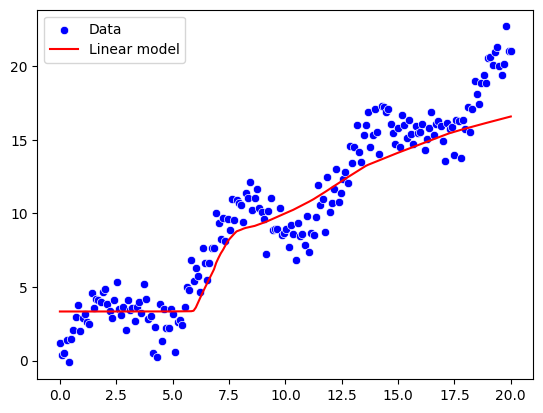

In [83]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')
